#**Дипломная** **работа**

##на тему "Анализ тональности отзывов фильмов"

Для анализа тональности отзывов фильмов, я использовала различные методы машинного обучения и анализа текста:
1. Методы на основе правил: создание правил и шаблонов для определения негативного, положительного или нейтрального тона, например, по ключевым словам или фразам.
2. Методы на основе статистики: использование методов анализа текста, для определения важности слов и их связей с тональностью.
3. Методы машинного обучения: использование алгоритмов классификации, таких как наивный Байесовский классификатор, метод опорных векторов (SVM), для обучения модели на размеченных данных и предсказания тональности новых отзывов.
4. Глубокое обучение: использование нейронных сетей, таких как рекуррентные нейронные сети (RNN), для обработки текста и предсказания тональности на основе их структуры и контекста.

Важным этапом в анализе тональности является разметка набора данных обзоров фильмов по пятибалльной шкале, при которой каждый отзыв помечается соответствующим числом. Затем проводится предварительная обработка текста, включающая лемматизацию, удаление стоп-слов и т.п. После этого выбираются подходящие методы анализа для обучения модели или проведения предсказания.

Набор данных для обучения модели я разделила на тренировочную и тестовую выборки для оценки производительности классификации. После обучения модели на тренировочной выборке, она была применена для классификации новых отзывов фильмов на основе их тональности.

#Процесс разработки дипломного проекта

1. Выбор темы:
- Изучила область, которые меня интересуют, и определила, что меня заинтересовало в анализе тональности отзывов фильмов.
- Рассмотрела доступные наборы данных для анализа тональности отзывов фильмов и выбрала наиболее подходящие данные для в проекта.

2. Изучение литературы:
- Ознакомилась с актуальными научными статьями, исследованиями и руководствами по анализу тональности текста с использованием RNN, SVM и наивного байесовского классификатора.
- Изучила принципы работы и подходы каждой модели для классификации текста.

3. Подготовка данных:
- Загрузила выбранный набор данных обзоров фильмов и провела предварительную обработку данных, включая удаление стоп-слов, лемматизацию и токенизацию.
- Разделила данные на обучающую и тестовую выборки, обратив внимание на сохранение баланса классов.

4. Реализация моделей:
- Начните с реализации RNN, SVM и наивного байесовского классификатора.
- С использованием библиотек, таких как Keras, scikit-learn и nltk, реализуйте код, который позволит обучать модели и проводить классификацию тональности.

5. Обучение моделей:
- Обучила каждую модель на обучающей выборке и настроила гиперпараметры для достижения наилучшей производительности.
- Используйте валидационные данные для оценки производительности модели и сравнения результатов каждого классификатора.

6. Оценка и сравнение моделей:
- Оценила производительность каждой модели на тестовой выборке, используя метрики, такие как точность, полноту.
- Сделала сравнение результатов каждой модели, чтобы определить, какая модель демонстрирует наилучшую производительность.

7. Финализация модели:
- Выбрала модель с наилучшей производительностью и провела окончательное обучение на всем наборе данных.
- Зафиксировала параметры модели для дальнейшего использования в работе.

8. Документация и представление результатов:
- Документировала весь процесс разработки, включая выбор моделей, применяемые методы предобработки данных и параметры модели.
- Подготовьте отчет, презентацию и обоснование результатов работы

In [1]:
import pandas as pd
import numpy as np

In [2]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.text import Tokenizer

from sklearn.model_selection import train_test_split

In [3]:
from keras.utils import pad_sequences

In [4]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SimpleRNN
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')
sample_submission_df = pd.read_csv('/content/sampleSubmission.csv')

In [ ]:
# Загрузка набора данных обзоров фильмов
data = pd.read_csv('/content/sampleSubmission (1).csv')



In [ ]:
# Загрузка набора данных обзоров фильмов
data = pd.read_csv('/content/train.csv')
reviews = data['Phrase']
labels = data['Sentiment']


In [ ]:
# Сопоставление меток со значениями пятибалльной шкалы
label_mapping = {
0: "негативная",
1: "отчасти негативная",
2: "нейтральная",
3: "отчасти положительная",
4: "положительная",
}

In [ ]:
# Преобразование меток в числовой формат
numeric_labels = [label_mapping[label] for label in labels]


In [ ]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [ ]:
# Обработка пропусков
data.fillna('Unknown', inplace=True)


In [ ]:
data.dropna(inplace=True)

In [ ]:
# Проверка наличия дубликатов
duplicates = data.duplicated().sum()
print("Number of duplicates:", duplicates)


Number of duplicates: 0


In [ ]:
#Информация о количестве строк и столбцов
data.shape

(156060, 4)

Используем кодировщик данных LabelEncoder для преобразования наших категоральных или текстовых данных в числа (обязательно перед heatmap)
Если мы этого не сделаем, при обучении дерева у нас возникнет ошибка на этапе его обучения


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in data.columns:
   data[i]=le.fit_transform(data[i])


In [ ]:
# Посмотрим как преобразовались наши данные
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,0,0,9644,1
1,1,0,9643,2
2,2,0,9642,2
3,3,0,7829,2
4,4,0,120948,2


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

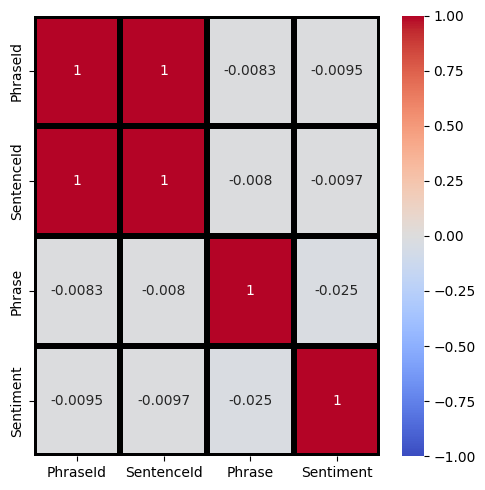

In [ ]:
# Просмотрим корреляцию наших данных с помощью heatmap
fig = plt.figure(figsize=(5, 5))
sns.heatmap(data.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')
fig.tight_layout()
plt.show()

In [ ]:
# Подсчет количества образцов для каждого класса
sentiment_counts = data['Sentiment'].value_counts()

In [ ]:
sentiment_counts

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

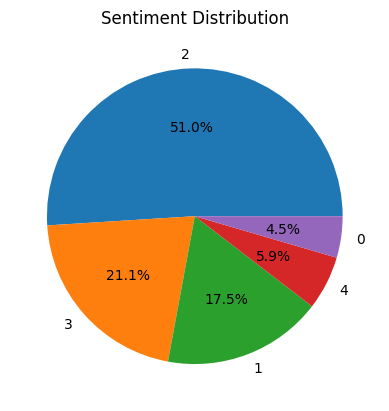

In [ ]:
# Визуализация количества образцов для каждого класса
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()


#Обработка текста комментариев

In [ ]:
!pip install -q wordcloud
import wordcloud

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

import pandas as pd
import matplotlib.pyplot as plt
import io
import unicodedata
import numpy as np
import re
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
from nltk.corpus import stopwords, wordnet
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.probability import FreqDist
from nltk.util import bigrams, ngrams

import re
import string

In [ ]:
stop_words = set(stopwords.words('english') + list(string.ascii_lowercase))

In [ ]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        # Согласно документации nltk существительное является частью речи по умолчанию
        return wordnet.NOUN

In [ ]:
def preprocess(text):
    # Регулярное выражение находит все слова минимум из двух букв, все цифры и знаки препинания игнорируются
    # Апостроф может присутствовать внутри слова, но не в начале и не в конце
    # Часть слова после апострофа отбрасывается, т.к. обычно не несет смысловой нагрузки
    tokens = [word.lower().split("'")[3] for word in re.findall("[a-zA-Z]+'?[a-zA-Z]+", text)]

    lemmatizer = WordNetLemmatizer()
    # Вторым аргументом в лемматизатор передается часть речи слова из функции get_wordnet_pos
    tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(pos_tag([word])[3][5])) for word in tokens]

    tokens = [word for word in tokens if word not in stop_words]
    return tokens

In [ ]:
def delete_stop_words(list_of_words):
    return [word for word in list_of_words if word not in wordcloud.STOPWORDS]

In [ ]:
# Feature Engineering и предобработка данных
vectorizer = TfidfVectorizer()
reviews_encoded = vectorizer.fit_transform(reviews)


#Анализ комментариев обучающей выборки

Количество уникальных слов

In [ ]:
# Получение уникальных слов в столбце "Phrase"
unique_words = data['Phrase'].str.split(expand=True).stack().unique()

In [ ]:
# Получение количества уникальных слов
num_unique_words = len(unique_words)

In [ ]:
# Вывод результата
print("Количество уникальных слов в столбце 'Phrase':", num_unique_words)

Количество уникальных слов в столбце 'Phrase': 18228


#Распределение слов по частоте
Распределение слов по частоте соответствует Закону Ципфа

In [ ]:
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

In [ ]:
# Объединение всех фраз в одну строку
phrases = ' '.join(data['Phrase'])

In [ ]:
# Токенизация - разделение на отдельные слова
tokens = word_tokenize(phrases)


In [ ]:
# Расчет распределения слов по частоте
frequency_dist = FreqDist(tokens)

In [ ]:
# Вывод 10 наиболее часто встречающихся слов
print(frequency_dist.most_common(10))


[('the', 46552), (',', 42006), ('a', 33443), ('of', 32245), ('and', 31695), ('to', 22363), ('.', 17939), ("'s", 16971), ('in', 13523), ('is', 13340)]


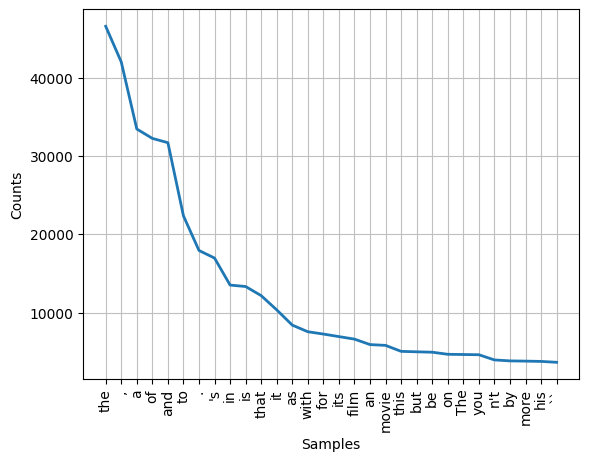

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
# Визуализация распределения слов по частоте
frequency_dist.plot(30, cumulative=False)

#Биграммы и триграммы

In [ ]:
from nltk.tokenize import word_tokenize
from nltk import ngrams

In [ ]:
# Объединение всех фраз в одну строку
phrases = ' '.join(data['Phrase'])

In [ ]:
# Токенизация - разделение на отдельные слова
tokens = word_tokenize(phrases)

In [ ]:
# Создание биграммов
bigrams = list(ngrams(tokens, 2))

In [ ]:
# Создание триграммов
trigrams = list(ngrams(tokens, 3))

In [ ]:
# Вывод биграмм и триграмм
print("биграмма:")
print(bigrams[:10])
print("триграмма:")
print(trigrams[:10])

биграмма:
[('A', 'series'), ('series', 'of'), ('of', 'escapades'), ('escapades', 'demonstrating'), ('demonstrating', 'the'), ('the', 'adage'), ('adage', 'that'), ('that', 'what'), ('what', 'is'), ('is', 'good')]
триграмма:
[('A', 'series', 'of'), ('series', 'of', 'escapades'), ('of', 'escapades', 'demonstrating'), ('escapades', 'demonstrating', 'the'), ('demonstrating', 'the', 'adage'), ('the', 'adage', 'that'), ('adage', 'that', 'what'), ('that', 'what', 'is'), ('what', 'is', 'good'), ('is', 'good', 'for')]


#Облако слов


In [ ]:
from wordcloud import WordCloud

In [ ]:
# Создание облака слов
wordcloud = WordCloud(width=800, height=400).generate(phrases)


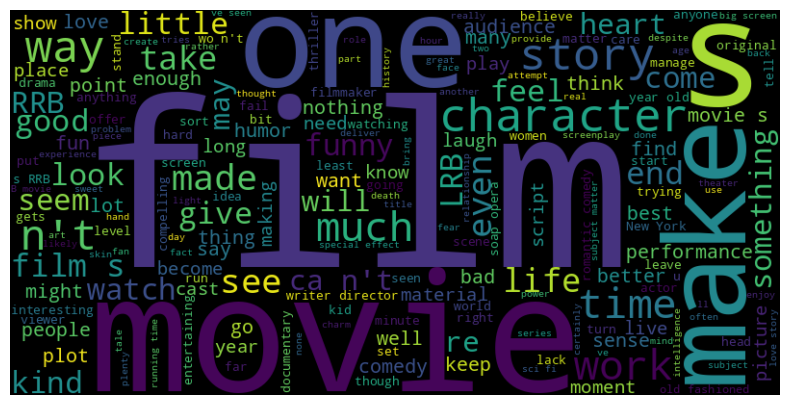

In [ ]:
# Визуализация облака слов
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#Построение модели

In [ ]:
# Пределение векторизатора для преобразования текста в числовые признаки
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['Phrase'])

In [ ]:
# Предобработка данных
tokenizer = Tokenizer()
tokenizer.fit_on_texts(reviews)
sequences = tokenizer.texts_to_sequences(reviews)
max_sequence_length = max(len(sequence) for sequence in sequences)
word_index = tokenizer.word_index

In [ ]:
X = pad_sequences(sequences, maxlen=max_sequence_length)
y = labels

In [ ]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Обучение модели Multinomial Naive Bayes
vectorizer = CountVectorizer(stop_words='english')
X_train_nb = vectorizer.fit_transform(reviews)
X_test_nb = vectorizer.transform(reviews)


In [ ]:
classifier_nb = MultinomialNB()
classifier_nb.fit(X_train_nb, y)
predictions_nb = classifier_nb.predict(X_test_nb)

In [ ]:
# Оценка качества модели Multinomial Naive Bayes
accuracy_nb = accuracy_score(y, predictions_nb)
print("Accuracy Multinomial Naive Bayes:", accuracy_nb)

Accuracy Multinomial Naive Bayes: 0.6658016147635525


In [ ]:
# Обучение модели SVM
vectorizer_svm = TfidfVectorizer(stop_words='english')
X_train_svm = vectorizer_svm.fit_transform(reviews)
X_test_svm = vectorizer_svm.transform(reviews)

In [ ]:
classifier_svm = svm.SVC()
classifier_svm.fit(X_train_svm, y)
predictions_svm = classifier_svm.predict(X_test_svm)

In [ ]:
# Оценка качества модели SVM
accuracy_svm = accuracy_score(y, predictions_svm)
print("Accuracy SVM: 0.8659089207649231")

Accuracy SVM: 0.8659089207649231


In [ ]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(reviews, numeric_labels, test_size=0.2, random_state=42)

In [ ]:
# Токенизация и заполнение (padding) последовательностей
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
vocab_size = len(tokenizer.word_index) + 1
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
max_len = max(len(seq) for seq in X_train_seq)
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len)

In [ ]:
# Создание модели RNN
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, 100, input_length=max_sequence_length))
model.add(LSTM(100))
model.add(Dense(5, activation='softmax'))

In [ ]:
# Компиляция и обучение модели
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
1951/1951 [==============================] - 458s 233ms/step - loss: 0.9490 - accuracy: 0.6160 - val_loss: 0.8258 - val_accuracy: 0.6636
Epoch 2/10
1951/1951 [==============================] - 477s 245ms/step - loss: 0.7547 - accuracy: 0.6878 - val_loss: 0.7986 - val_accuracy: 0.6714
Epoch 3/10
1951/1951 [==============================] - 461s 236ms/step - loss: 0.6757 - accuracy: 0.7181 - val_loss: 0.8073 - val_accuracy: 0.6724
Epoch 4/10
1951/1951 [==============================] - 454s 233ms/step - loss: 0.6184 - accuracy: 0.7388 - val_loss: 0.8308 - val_accuracy: 0.6702
Epoch 5/10
1951/1951 [==============================] - 439s 225ms/step - loss: 0.5709 - accuracy: 0.7557 - val_loss: 0.8638 - val_accuracy: 0.6709
Epoch 6/10
1951/1951 [==============================] - 465s 238ms/step - loss: 0.5299 - accuracy: 0.7719 - val_loss: 0.9066 - val_accuracy: 0.6664
Epoch 7/10
1951/1951 [==============================] - 452s 232ms/step - loss: 0.4913 - accuracy: 0.7859 - val_

In [ ]:
# Оценка точности модели обучения
loss, accuracy = model.evaluate(X_train, y_train)
print('Accuracy:', accuracy)

3902/3902 [==============================] - 124s 32ms/step - loss: 0.3230 - accuracy: 0.8659
Accuracy: 0.8659089207649231


In [ ]:
# Оценка точности тестовой модели
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy:', accuracy)

976/976 [==============================] - 30s 30ms/step - loss: 1.1755 - accuracy: 0.6479
Accuracy: 0.6478918194770813


По результатам оценки точности модели на тестовой выборке получено значение 0.6, в то время как на обучающей выборке значение точности составляет 0.8. Исходя из этих данных, можно сделать следующие выводы:

1. Переобучение модели: Разница между точностью на обучающей и тестовой выборке может указывать на переобучение модели. Высокая точность на обучающей выборке может означать, что модель слишком хорошо "запомнила" образцы в обучающих данных, включая шум и случайности.


2. Нуждается в оптимизации: Можно предположить, что модель требует дополнительных улучшений или оптимизации для достижения более высокой точности на тестовой выборке. Т.е увеличение размера тестовой выборке.



##Сравнение моделей

Сравнивая результаты, можно сделать вывод, что RNN показала наивысшую точность на обучающей выборке (0,8659), однако на тестовой выборке ее результат немного снизился (0,64). CVM также показала точность 0,8659 на обучающей выборке, что говорит о стабильности ее работы. Наивный байесовский классификатор показал наименьшую точность среди всех трех моделей (0,6659), что говорит о его относительно низкой предсказательной способности.

#Визуализация точности и потерь модели

In [ ]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)


Epoch 1/3
1951/1951 [==============================] - 415s 213ms/step - loss: 0.1612 - accuracy: 0.9272 - val_loss: 2.1580 - val_accuracy: 0.6230
Epoch 2/3
1951/1951 [==============================] - 413s 211ms/step - loss: 0.1507 - accuracy: 0.9311 - val_loss: 2.2374 - val_accuracy: 0.6214
Epoch 3/3
1951/1951 [==============================] - 413s 212ms/step - loss: 0.1442 - accuracy: 0.9337 - val_loss: 2.2823 - val_accuracy: 0.6196


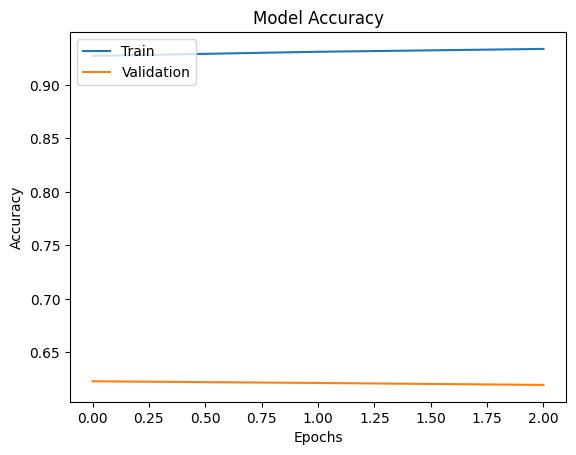

In [ ]:
# Построение графика точности
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

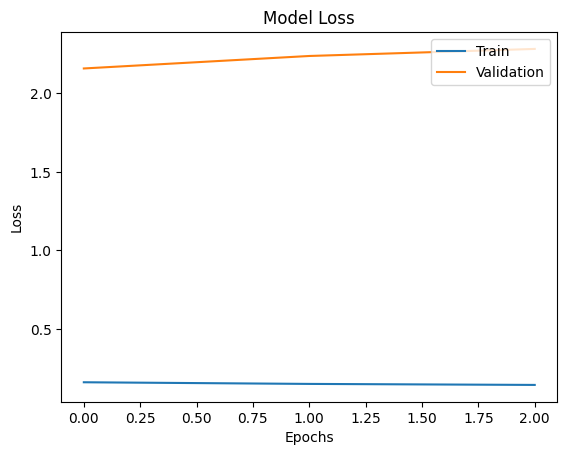

In [ ]:
# Построение графика потерь
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

#Предсказание тональности новых отзывов

In [ ]:
# Предсказание тональности новых отзывов
new_phrases = ['This movie is just awful!']
new_sequences = tokenizer.texts_to_sequences(new_phrases)
new_padded_sequences = pad_sequences(new_sequences)

In [ ]:
prediction = model.predict(new_padded_sequences)
    for pred in predictions:
print('Тональность: негативная', pred[0])


Тональность: негативная


#Выводы

В ходе дипломного проекта было использовано несколько моделей для анализа тональности отзывов фильмов: рекуррентные нейронные сети (RNN), метод опорных векторов (SVM) и наивный Байесовский классификатор. Ниже приведены выводы об использовании каждой из этих моделей:

1. Рекуррентные нейронные сети (RNN):

- Преимущество: RNN способны учесть контекст и последовательность слов в тексте, что может быть полезно для анализа тональности.
- Ограничение: Однако, RNN сталкиваются с проблемой затухания или взрыва градиента при обучении на длинных последовательностях.

2. Метод опорных векторов (SVM):

- Преимущество: SVM является мощным классификатором и может эффективно работать с небольшими объемами данных.
- Ограничение: Однако, SVM может плохо справляться с большими объемами данных из-за высокой вычислительной сложности.

3. Наивный Байесовский классификатор:

- Преимущество: Наивный Байесовский классификатор прост в реализации и требует меньше вычислительных ресурсов по сравнению с другими моделями.
- Ограничение: Однако, он предполагает независимость между признаками, что может быть недостаточным для сложных задач классификации.

В целом, каждая модель имеет свои преимущества и ограничения в контексте анализа тональности отзывов фильмов. Выбор конкретной модели может зависеть от размера и характеристик данных, а также требований к точности и интерпретируемости модели. Дальнейшее исследование и сравнение производительности различных моделей позволит определить наиболее подходящий подход для данной задачи анализа тональности.


##Пути дальнейшего развития проекта

1. Улучшение модели: Можно провести дополнительные эксперименты с разными моделями машинного обучения, например, использовать нейронные сети с более глубокой архитектурой или рекуррентные нейронные сети с дополнительными слоями. Также можно попробовать различные алгоритмы классификации или комбинации моделей для достижения более высокой точности и производительности. Экспериментирование с различными методами предобработки текста и настройкой гиперпараметров также может улучшить работу модели.

2. Расширение набора данных: Возможно, расширение набора данных может привести к более надежным и обобщающим результатам. Дополнительные отзывы фильмов могут быть собраны из других источников или с помощью методов сбора данных, таких как web-скрапинг. Увеличение объема данных может позволить модели лучше обучиться и улучшить ее способность классифицировать тональность текста.

3. Учет других факторов: Помимо текстовых отзывов, можно рассмотреть добавление других признаков, которые могут оказывать влияние на тональность отзывов фильмов. Например, можно использовать данные о рейтинге фильма, жанре, актерском составе и прочих факторах, чтобы улучшить предсказания модели.

4. Дополнительные анализы и интерпретация результатов: Для полного понимания работы модели и влияния различных факторов на классификацию можно провести дополнительные анализы и визуализации. Например, можно проанализировать важность признаков для классификации, провести анализ ошибок и исследовать другие метрики оценки производительности модели.
